# 3.3.4 Ejemplo: inferencia de un vector desconocido

**Propósito:** $\;$ predicción de un vector $\boldsymbol{z}\in\mathbb{R}^D$ a partir de $N$ medidas ruidosas independientes $\,\mathcal{D}=(\boldsymbol{y}_1,\dotsc,\boldsymbol{y}_N),\,\boldsymbol{y}_n\in\mathbb{R}^D$

**Sistema Gaussiano lineal:** $\;$ con $\,\boldsymbol{b}=\boldsymbol{0}\,$ y $\,\mathbf{W}=\mathbf{I}_D$
$$\begin{align*}
p(\boldsymbol{z})%
&=\mathcal{N}(\boldsymbol{z}\mid\boldsymbol{\mu}_z,\mathbf{\Sigma}_z)
&\to&&p(\boldsymbol{z})%
&=\mathcal{N}(\boldsymbol{z}\mid\boldsymbol{0},\mathbf{\Sigma}_z)\quad(\text{p.e.}\;\mathbf{\Sigma}_z=\infty\mathbf{I})\\[3mm]
p(\boldsymbol{y}\mid\boldsymbol{z})%
&=\mathcal{N}(\boldsymbol{y}\mid\boldsymbol{z},\mathbf{\Sigma}_y)%
&\to&&p(\mathcal{D}\mid\boldsymbol{z})%
&=\prod_{n=1}^N\mathcal{N}(\boldsymbol{y}_n\mid\boldsymbol{z},\mathbf{\Sigma}_y)%
=\mathcal{N}\biggl(\bar{\boldsymbol{y}}\mid\boldsymbol{z},\frac{1}{N}\mathbf{\Sigma}_y\biggr)%
\end{align*}$$

**Regla de Bayes (posterior):** $\;$ con $\,\boldsymbol{b}=\boldsymbol{0}\,$ y $\,\mathbf{W}=\mathbf{I}_D$
$$\begin{align*}
p(\boldsymbol{z}\mid\boldsymbol{y})%
&=\mathcal{N}(\boldsymbol{z}\mid\boldsymbol{\mu}_{z|y},\mathbf{\Sigma}_{z|y})%
\quad\text{con}\quad%
\mathbf{\Sigma}_{z|y}^{-1}=\mathbf{\Sigma}_z^{-1}+\mathbf{\Sigma}_y^{-1}%
\quad\text{y}\quad%
\boldsymbol{\mu}_{z|y}=\mathbf{\Sigma}_{z|y}\,[\mathbf{\Sigma}_y^{-1}\boldsymbol{y}+\mathbf{\Sigma}_z^{-1}\boldsymbol{\mu}_z]\\[3mm]
p(\boldsymbol{z}\mid\mathcal{D})%
&=\mathcal{N}(\boldsymbol{z}\mid\overgroup{\boldsymbol{\mu}},\overgroup{\mathbf{\Sigma}})%
\quad\text{con}\quad%
\overgroup{\mathbf{\Sigma}}^{-1}=\mathbf{\Sigma}_z^{-1}+N\mathbf{\Sigma}_y^{-1}
\quad\text{y}\quad%
\overgroup{\boldsymbol{\mu}}=\overset{\frown}{\mathbf{\Sigma}}(\mathbf{\Sigma}_y^{-1}(N\bar{\boldsymbol{y}})+\mathbf{\Sigma}_z^{-1}\boldsymbol{\mu}_z)
\end{align*}$$

**Ejemplo:** $\quad\boldsymbol{y}_n\sim\mathcal{N}(\boldsymbol{z},\mathbf{\Sigma}_y)\;$ con $\;\boldsymbol{z}=(0.5,0.5)^t\;$ y $\;\mathbf{\Sigma}_y=0.1\begin{pmatrix}2&1\\1&1\end{pmatrix}$

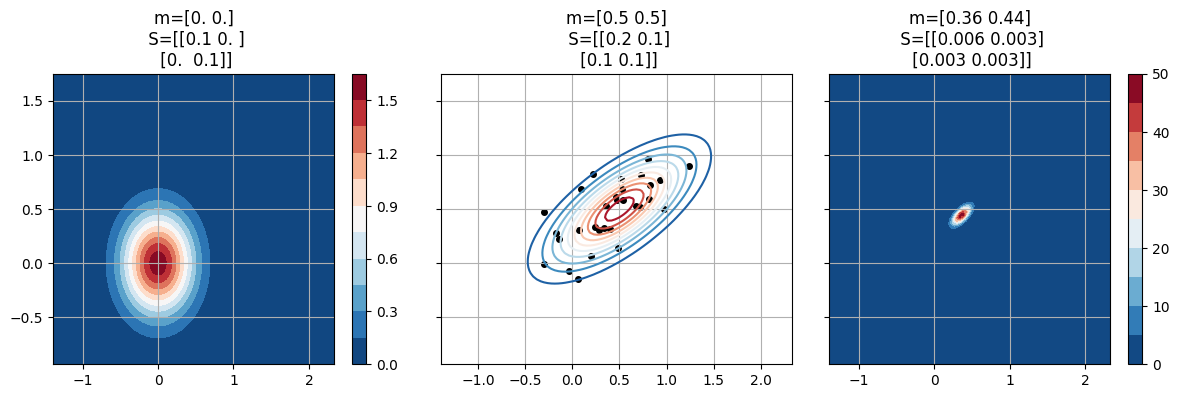

In [1]:
import numpy as np; import matplotlib.pyplot as plt; from scipy.stats import multivariate_normal as mvn
mz = np.zeros(2); Sz = 0.1 * np.eye(2); Szi = np.linalg.inv(Sz)
N = 30; my = np.array([0.5, 0.5]); Sy = 0.1 * np.array([[2, 1], [1, 1]]); Syi = np.linalg.inv(Sy)
Y = mvn(my, Sy).rvs(N, random_state=13); mY = np.mean(Y, axis=0);
Szy = np.linalg.inv(Szi + N*Syi); mzy = Szy @ (Syi @ (N*mY) + Szi @ mz);
fig, axs = plt.subplots(1, 3, figsize=(12,3.5), sharey=True); fig.tight_layout()
ax = axs[1]; ax.grid(); ax.set_title(f'm={np.round(my, 2)}\n S={np.round(Sy, 3)}')
ax.scatter(*Y.T, s=16, c='k'); zoom = 1.2
x1min, x1max = ax.get_xlim(); R = zoom*(x1max-x1min)/2.0; x1min -= R; x1max += R
x2min, x2max = ax.get_ylim(); R = zoom*(x2max-x2min)/2.0; x2min -= R; x2max += R
x1, x2 = np.meshgrid(np.linspace(x1min, x1max, 100), np.linspace(x2min, x2max, 100))
p = mvn(my, Sy).pdf(np.dstack((x1, x2))); ax.contour(x1, x2, p, 10, cmap='RdBu_r')
ax = axs[0]; ax.grid(); ax.set_title(f'm={np.round(mz, 2)}\n S={np.round(Sz, 3)}')
p = mvn(mz, Sz).pdf(np.dstack((x1, x2)))
cp = ax.contourf(x1, x2, p, 10, cmap='RdBu_r'); plt.colorbar(cp, ax=ax)
ax = axs[2]; ax.grid(); ax.set_title(f'm={np.round(mzy, 2)}\n S={np.round(Szy, 3)}')
p = mvn(mzy, Szy).pdf(np.dstack((x1, x2)))
cp = ax.contourf(x1, x2, p, 10, cmap='RdBu_r'); plt.colorbar(cp, ax=ax);